In [10]:
! pip install kaggle

In [11]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
! kaggle datasets download -d yasserh/titanic-dataset


titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
! unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
import pandas as pd
import numpy as np
import requests

In [54]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
import matplotlib.pyplot as plt


In [56]:
interval_range = pd.interval_range(start=0,
                                   freq=10,
                                   end=80)
interval_range

IntervalIndex([(0, 10], (10, 20], (20, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80]], dtype='interval[int64, right]')

In [57]:
df['Age_range'] = pd.cut(df['Age'], bins = interval_range)

<Axes: xlabel='Age_range', ylabel='Count'>

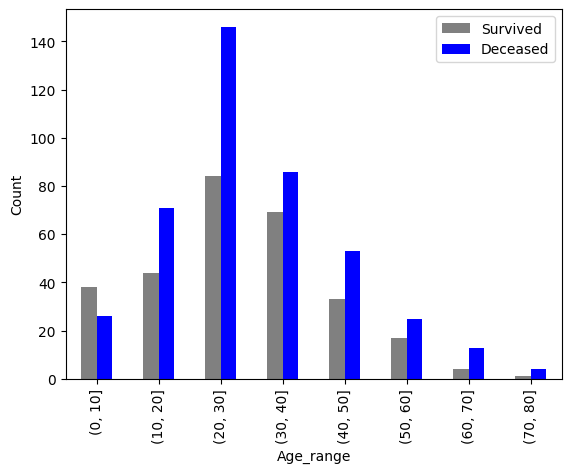

In [58]:
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
df_bar=pd.DataFrame()
df_bar['Survived'] = df['Age'].loc[df['Survived'] == 1].groupby(df['Age_range']).count()
df_bar['Deceased'] = df['Age'].loc[df['Survived'] == 0].groupby(df['Age_range']).count()
df_bar.plot.bar(ylabel = 'Count', color = ['gray','blue'])